# Gradient Descent Notes + Implementation

## Potential Improvements
You cannot recreate this from scratch. The concept is still rather shaky. Needless to say the implementation. 

- Explain things simply and in GREAT detail. 
- More rigourous and intuitive explanations of Partial Derivates of weight and bias
- Explain how the data was split for training, validation and testing

In [10]:
import pandas as pd

# Load data
# index_col=0 --> Specify initial column from where to get the begin data access and retrival
data = pd.read_csv(r"C:\Users\joshi\clean_weather.csv", index_col=0)

# .ffill() --> Method is used to forward fill missing values in a DataFrame or a Series. 
# "Forward filling" means that missing values are replaced with the last valid observation before 
# the missing data point. This method is often used to impute missing data with the most recent 
# available value.

data = data.ffill()

# NOTE: None of the following methods work if we do not impute--"fill in"--our data.
data.shape
data.head(5)


(13509, 4)

## Linear Regression

Linear regression is a simple and widely used statistical technique in machine learning and statistics. It aims to establish a relationship between a dependent variable (the outcome we want to predict) and one or more independent variables (predictors or features). The relationship is assumed to be linear, meaning it can be represented by a straight line in a two-dimensional space or a hyperplane in a higher-dimensional space.

The primary goal of linear regression is to find the best-fitting line (or hyperplane) that minimizes the difference between the predicted values and the actual values of the dependent variable. This line is determined by estimating the coefficients (weights) of the independent variables, which represent the impact or influence of each predictor on the outcome.

$\hat_{y} = w_{1} * x_{1} + b$

<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

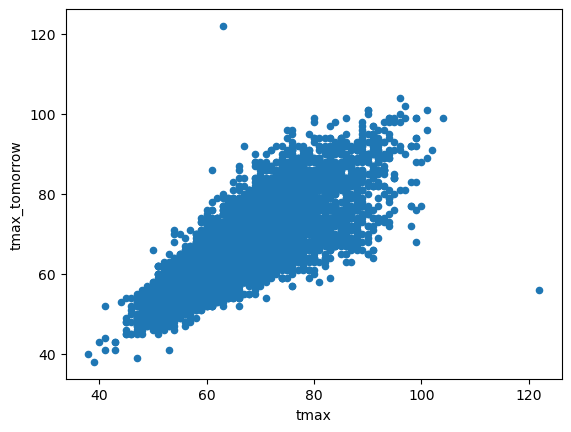

In [11]:
data.plot.scatter('tmax', 'tmax_tomorrow')

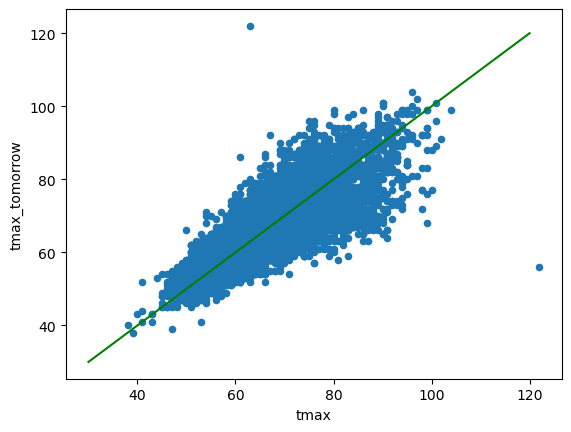

In [15]:
import matplotlib.pyplot as plt
import math

data.plot.scatter('tmax', 'tmax_tomorrow')

# 1st argument --> [x_initial, x_final]
# 2nd argument --> [y_initial, y_final]
plt.plot([30, 120], [30, 120], 'green')


$\hat{y} = w_{1}*x_{1} + b$

$\hat{y}$ --> prediction | $w_{1}$ --> weight | $x_{1}$ --> t-max today | $b$ --> bias

You can add other parameters, say t-min in the form of $x_{1}$

$\hat{y} = w_{1}*x_{1} + w_{2}*x_{2} + b$

In [16]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression class
lr = LinearRegression()

# TRAINING LINEAR REGRESSION MODEL
'''
To "train a linear regression model" means to use a set of input data (features) and 
corresponding known output data (labels or target variable) to estimate the coefficients
(weights) of the linear regression equation. The goal is to find the best-fitting line 
(or hyperplane) that represents the relationship between the input features and the target variable.
'''
# data[["tmax"]] --> input features (independent variables) of the model. 
# The double brackets [[...]] are used to create a DataFrame from a single column.
# data['tmax_tomorrow'] --> Represents Target (dependent variable) that we want to 
# predict using the linear regression model.
lr.fit(data[["tmax"]], data['tmax_tomorrow'])

LinearRegression()

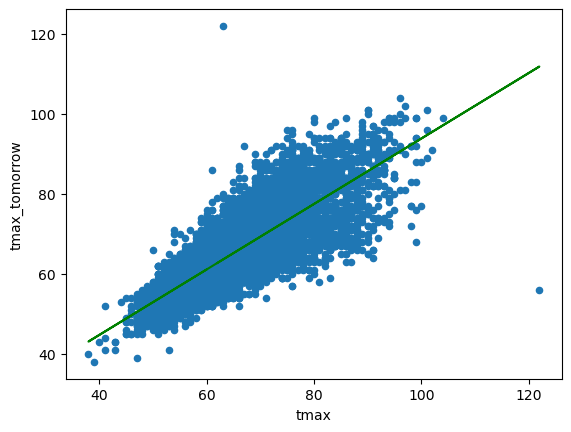

In [17]:
data.plot.scatter('tmax', 'tmax_tomorrow')
plt.plot(data["tmax"], lr.predict(data[["tmax"]]), 'green')

In [18]:
print(f'Weight: {lr.coef_[0]:.2f}')
print(f'Bias: {lr.intercept_:.2f}')

Weight: 0.82
Bias: 11.99


## Measuring Loss--Intuition

Use the mean squared error to compute the loss (difference between predicted and true outcome).

$MSE=(\hat{y }- y)^2$

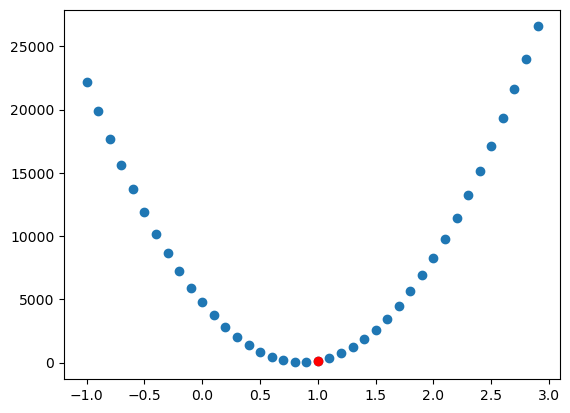

In [25]:
import numpy as np

# Set loss function
loss = lambda w, y: ((w*80 + 11.99) - y) ** 2
y = 81

# Set array of potential weights (used to compute loss for various weights)
ws = np.arange(-1, 3, 0.1)
losses = loss(ws, y)

plt.scatter(ws, losses)
# Plot for our particular loss value
plt.plot(1, loss(1, y), 'ro')

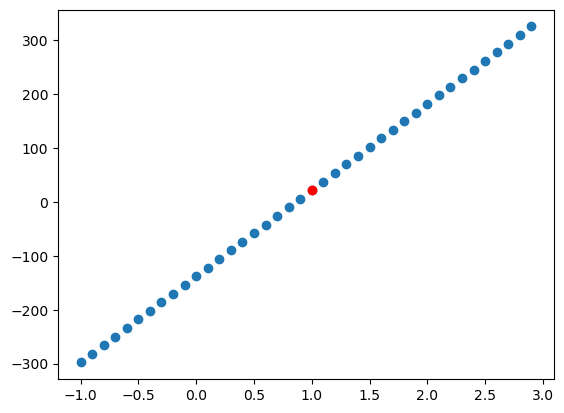

In [26]:
# Gradient --> How quickly the loss is changing as the weight changes
#          --> The Rate of Change or the DERIVATIVE of the loss graph
gradient = lambda w, y: ((w * 80 + 11.99) - y) * 2 
gradients = gradient(ws, y)

plt.scatter(ws, gradients)
plt.plot(1, gradient(1, y), 'ro')

## Gradients and Partial Derivatives

We want to guage the influence of weight and bias on the loss. We can take the partial derivative of the bias and the weight to assess their impact on the loss.

**Partial Derivative of Bias**

Since bias is added to the prediction. Any change in bias, therefore, directly changes the prediction and consequently loss. If we wish to reduced error, we adjust bias and the prediction in the same manner.

$\frac{\partial L}{\partial b}=\partial L$

**Partial Derivative of Weight**

$\frac{\partial L}{\partial w}=\frac{\partial L}{\partial (x*w)}\frac{\partial (x*w)}{\partial w}$

Since $x*w$ is ADDED to bias, this product too has a direct or proportional impact on the prediction. Therefore, 

$\frac{\partial L}{\partial (x*w)}=\partial L$

Since we multiply $w$ by $x$, any change to $w$ will change the prediction proportional to $x$. So:

$\frac{\partial L}{\partial w}={\partial L}*x$

Intuitively, we are interested in assessing the impact of the weight and bias parameters on our loss function, which in turn is directly influenced by the prediction ($\hat{y}$). Note that the changes in the weight will have a more radical change in the prediction--as it is multiplied with x (independent variable)--compared to the bias, which is a constant being added. 
 

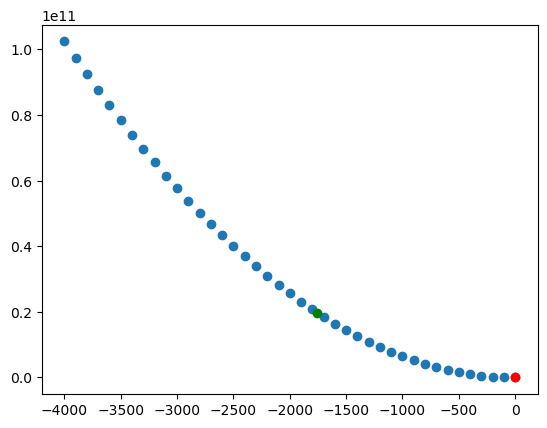

In [27]:
# Reset weight array and losses array
ws = np.arange(-4000,100,100)
losses = loss(ws, y)

# Plot the weight and losses
plt.scatter(ws, losses)

# Original weight
plt.plot(1, loss(1, y), 'ro')
# New weight
new_weight = 1 - gradient(1,y)*80
plt.plot(new_weight, loss(new_weight, y), 'go')

## Learning Rate

To adapt to the much too common scenario of a gradient changing, we use learning rates to temper changes in our key parameters.

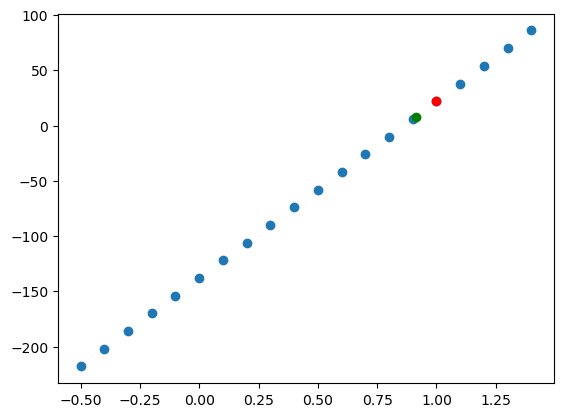

In [30]:
import numpy as np
# Calculate gradient values for several weights
gradients = gradient(ws, y)

# Plot the weight and gradients
plt.scatter(ws, gradients)
plt.plot(1, gradient(1, y), 'ro')
# New weight
plt.plot(new_weight, gradient(new_weight, y), 'go')

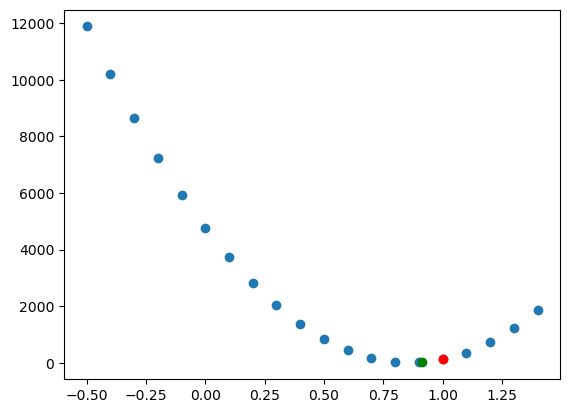

In [32]:
ws = np.arange(-.5, 1.5, .1)
losses = loss(ws, y)

plt.scatter(ws, losses)
plt.plot(1, loss(1, y), 'ro')

# Set learning rate
lr = 5e-5

# 1 --> The original (initial) weight value. 
# gradient(1,y) --> Gradient dictates the direction of step-size
new_weight = 1 - lr * gradient(1, y) * 80
plt.plot(new_weight, loss(new_weight, y), 'go')

### Batching

We have been working with the one data point and set of parameters to develop our intuition for gradient descent and how the loss function operates. In our larges data set, will be using a techinque called **batching** which is commonly used in linear regression. Batching includes computing the loss function of a every data point and taking the average. The task of the Neural Network is to minimize this average. 

## Implementing Linear Regression

In [33]:
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = 'tmax_tomorrow'

np.random.seed(0)

# Split Data in training, validation and testing data. ???
split_data = np.split(data, [int(.7 * len(data)), int(.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in split_data]

To train a linear regression algorithm using gradient descent, we need 4 elements:

    A way to initialize our parameters (weights and biases)
    A forward pass that computes predictions using the parameters
    A loss function that measures the error of our predictions
    A backward pass that updates our parameters to reduce the loss


In [34]:
import math

def init_params(predictors):
    # Initialize model parameters
    # # k is a scaling factor that we use to reduce the weights and biases initially
    # k = math.sqrt(1 / predictors)
    # We set a random seed so if we re-run this code, we get the same results
    '''
     When you set a random seed, it initializes the random number generator to a specific 
     starting state. As a result, subsequent random operations will follow a deterministic 
     sequence of random numbers. This deterministic behavior allows you to obtain the same 
     random values every time you run the code with the same seed.
    '''
    np.random.seed(0)
    weights = np.random.rand(predictors, 1) # * 2 * k - k
    biases = np.ones((1, 1)) # * 2 * k - k
    return  [weights, biases]

In [39]:
def forward(params, x):
    weights, biases = params
    prediction = x @ weights + biases
    return prediction

In [38]:
def mse(actual, predicted):
    # Calculate MEAN squared error
    return np.mean((actual - predicted) ** 2)

def mse_grad(actual, predicted):
    # The derivative of mean squared error.
    # NOTE: We do not MULTIPLY by 2. This is for convience. We can use the learning rate to achieve 
    # similar effects
    return predicted - actual

In [41]:
'''
In the backward pass of the network, we adjust and by the partial derivative times learning rate. 
We will make predictions for our whole training set, then average the gradient across the whole 
set to compute the updates. This will ensure that a single training example doesn't pull the gradient 
too far in one direction or another.
'''

# params --> [weights, biases]
# x --> Inputs (features)
# lr --> Learning Rate
# grad --> Gradient

def backward(params, x, lr, grad):
    # Multiply the gradient by the x values
    # Divide x by the number of rows in x to avoid updates that are too large.
    # Since we divide by x, we are dealing with averages once again
    w_grad = (x.T / x.shape[0]) @ grad
    b_grad = np.mean(grad, axis=0)

    params[0] -= w_grad * lr
    params[1] -= b_grad * lr

    return params

## Training Loop

Design a loop to repeated modify parameters until the error or loss is sufficently low.

In [46]:
lr = 1e-4
epochs = 100000
params = init_params(train_x.shape[1])

# # Store weights and gradients so we can visualize
# # Not necessary for algorithm
# sample_rate = 100
# samples = int(epochs / sample_rate)
# historical_ws = np.zeros((samples, train_x.shape[1]))
# historical_gradient = np.zeros((samples,))

for i in range(epochs):
    predictions = forward(params, train_x)
    grad = mse_grad(train_y, predictions)

    params = backward(params, train_x, lr, grad)

    # # Store historical weights for visualization
    # if i % sample_rate == 0:
    #     index = int(i / sample_rate)
    #     historical_gradient[index] = np.mean(grad)
    #     historical_ws[index,:] = params[0][:,0]

    # Display validation loss
    if i % 10000 == 0:
        predictions = forward(params, valid_x)
        valid_loss = mse(valid_y, predictions)

        print(f"Epoch {i} loss: {valid_loss}")

Epoch 0 loss: 31.56402059742028
Epoch 10000 loss: 22.61088520845247
Epoch 20000 loss: 22.57697170967892
Epoch 30000 loss: 22.543916259870393
Epoch 40000 loss: 22.51169358128674
Epoch 50000 loss: 22.48027929372645
Epoch 60000 loss: 22.44964987259221
Epoch 70000 loss: 22.41978261258449
Epoch 80000 loss: 22.390655593191592
Epoch 90000 loss: 22.36224764587822
